In [12]:
import pandas as pd
import numpy as np

In [90]:
# Leemos los datos de terremotos y filtramos las features.
quakes_df = pd.read_csv('Data/quakes.csv')
print(len(quakes_df))
quakes_df.columns

415677


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [92]:
quakes_df = quakes_df[['latitude', 'longitude', 'depth', 'mag', 'time']]
quakes_df.head()

,latitude,longitude,depth,mag,time
0,37.6457,20.8702,10.00,4.7,2018-10-27T18:33:12.420Z
1,65.2234,-151.6636,16.60,5.3,2018-10-27T16:57:27.956Z
2,-22.4704,-68.6516,113.79,4.7,2018-10-27T15:46:43.390Z
3,-56.0652,-27.4276,93.78,4.9,2018-10-27T15:00:46.800Z
4,37.3128,20.4930,10.00,4.6,2018-10-27T14:33:26.470Z


In [93]:
# Leemos los dato de tsunamis y seleccionamos las features
tsunamis_df = pd.read_csv('Data/tsunamis.tsv', sep='\t', encoding='iso-8859-1')
tsunamis_df = tsunamis_df[tsunamis_df['YEAR'] >= 1984]
tsunamis_df = tsunamis_df[['PRIMARY_MAGNITUDE', 'LATITUDE', 'LONGITUDE', 'YEAR']]
print(len(tsunamis_df))
tsunamis_df.head()

296


,PRIMARY_MAGNITUDE,LATITUDE,LONGITUDE,YEAR
849,5.4,38.396,22.094,1984
850,7.2,44.117,148.192,1984
851,5.5,31.448,140.036,1984
852,7.0,32.386,131.945,1984
853,6.9,34.006,141.500,1984


Es posibe observar que existen 415677 terremotos y tan solo 1145 tsunamis. Este problema de desbalance se nivelará filtrando intervalos con muchos terremotos y pocos tsunamis, es decir, el rango de magnitudes bajas. A continuación observaremos los datos para determinar un punto de corte.

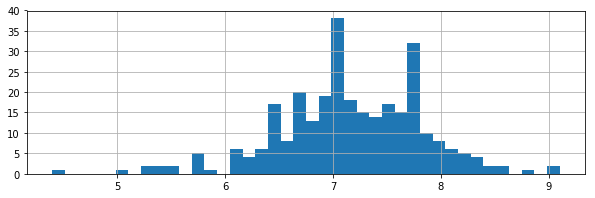

In [94]:
# Observamos distribuciones de la magnitud
plt = tsunamis_df['PRIMARY_MAGNITUDE'].hist(bins=40, figsize=(10, 3))

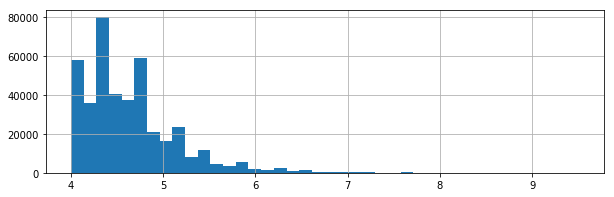

In [95]:
plt = quakes_df['mag'].hist(bins=40, figsize=(10, 3))

A partir de los histogramas, es posible apreciar que la gran mayoria de los terremotos bajo 6 grados aproximadamente, no genera tsunami alguno. Por esta razón es que lo consideraremos como el punto de corte.

In [96]:
corte = 6.2
print(len(tsunamis_df[tsunamis_df['PRIMARY_MAGNITUDE'] > corte]))
print(len(quakes_df[quakes_df['mag'] > corte]))

272
6170


In [74]:
tsunamis_df = tsunamis_df[tsunamis_df['PRIMARY_MAGNITUDE'] > corte]
quakes_df = quakes_df[quakes_df['mag'] > corte]

Ahora, procederemos a hacer el join de ambas tablas

In [79]:
# Creamos una nueva columna en el dataset de terremotos,
# que por defecto será la ausencia de tsunami.
quakes_df = quakes_df.assign(tsunami=pd.Series(np.zeros(len(quakes_df))))
quakes_df.head()

,latitude,longitude,depth,mag,time,tsunami
79,37.5055,20.5626,14.00,6.8,2018-10-25T22:54:51.830Z,0.0
147,49.3142,-129.6725,10.00,6.5,2018-10-22T06:22:48.810Z,0.0
148,49.3468,-129.2135,10.00,6.8,2018-10-22T06:16:28.160Z,0.0
149,49.2496,-129.4783,10.96,6.6,2018-10-22T05:39:40.330Z,0.0
335,-21.7260,169.4867,10.00,6.4,2018-10-16T01:03:43.090Z,0.0


In [87]:
for index, row in quakes_df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    mag = row['mag']
    year = row['time'][:4]
    
    print(year)

2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2015
2015
2015
2015


2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1989
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987
1987


1926
1926
1926
1926
1926
1926
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921


1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1985
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
